In [18]:
#imports

import pandas as pd
import numpy as np
import env
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
%matplotlib inline


In [19]:
df_telco = acquire.get_telco_data()

In [ ]:
df_telco.head()


In [ ]:
#columns to get dummies
#multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract_type, internet_service_type, payment_type
#churn change to int

In [ ]:
def more_dummies(df):
    cols_to_dummify = ['multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies,' 'contract_type', 'internet_service_type', 'payment_type']

    for col in cols_to_dummify:
       df_telco_dummies = pd.get_dummies(cols_to_dummify)
    return df_telco_dummies
    

In [ ]:
df_telco_dummies = more_dummies(df_telco)

In [ ]:
#finish cleaning data, then split (train, validate, test), then explore on the train dataset

In [ ]:
#split data
prepare.train_test_split(df_telco)

In [ ]:
# sns.barplot(x = "monthly_charges", y = "churn", data = df_telco)
# this one would be useful once the dataset is split 

In [20]:
prepped_telco = prepare.prep_telco(df_telco)


In [ ]:
prepped_telco.info()

In [ ]:
prepare.train_test_split(prepped_telco, prepped_telco.churn_Yes)

In [ ]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on churn_Yes.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn_Yes)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn_Yes)
    return train, validate, test


In [21]:
train, validate, test = split_data(prepped_telco)

In [22]:
train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5310,7503-MIOGA,1,72,89.85,6697.35,0,1,0,1,1,...,1,0,1,0,1,0,0,0,0,0
3790,5329-KRDTM,1,72,77.35,5396.25,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,0,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
2635,3748-FVMZZ,0,4,40.05,162.45,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2986,4280-DLSHD,0,8,54.75,445.85,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,0,72,103.40,7372.65,1,1,1,1,1,...,1,0,1,0,1,1,0,0,1,0
356,0523-VNGTF,1,52,50.50,2566.30,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2128,3058-HJCUY,0,41,102.60,4213.35,1,1,1,1,1,...,1,0,1,1,0,1,0,0,1,0
3586,5081-NWSUP,0,10,64.90,685.55,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
validate

In [ ]:
test

In [ ]:
train.info()

- - -

- - -

## Moving onto Exploratory Analysis and Statistical Testing

In [23]:
# use only the train dataset for analaysis and testing

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5310 to 6817
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3943 non-null   object 
 1   senior_citizen                         3943 non-null   int64  
 2   tenure                                 3943 non-null   int64  
 3   monthly_charges                        3943 non-null   float64
 4   total_charges                          3943 non-null   float64
 5   gender_Male                            3943 non-null   uint8  
 6   partner_Yes                            3943 non-null   uint8  
 7   dependents_Yes                         3943 non-null   uint8  
 8   phone_service_Yes                      3943 non-null   uint8  
 9   paperless_billing_Yes                  3943 non-null   uint8  
 10  churn_Yes                              3943 non-null   uint8  
 11  m

## Questions I want to explore:

1) Are customers with higher tenure less likely to churn?  
2) Are individual customers more likely to churn than those with a partner or dependents?
3) So higher monthly charges contribute to higher churn?
4) Do certain contract types have higher churn?
5) Does fiber optic service type  have lower churn?

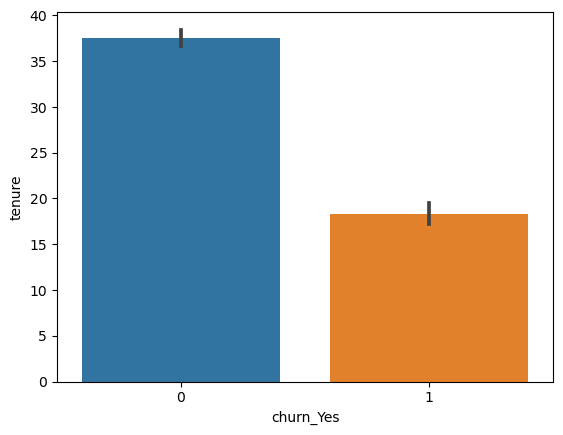

In [41]:
tenure_churn_barplot = sns.barplot(data = train, x = 'churn_Yes', y = 'tenure')
#this shows that higher tenure is less likely to churn
#newer customers/lower tenure more likely to churn


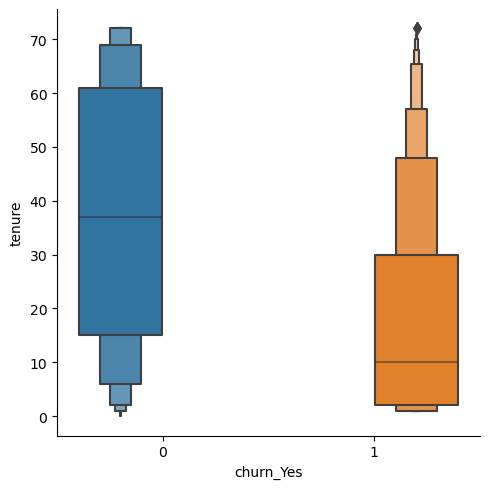

In [46]:
sns.catplot(data = train, x = 'churn_Yes', y = 'tenure', hue = 'churn_Yes', kind = 'boxen')

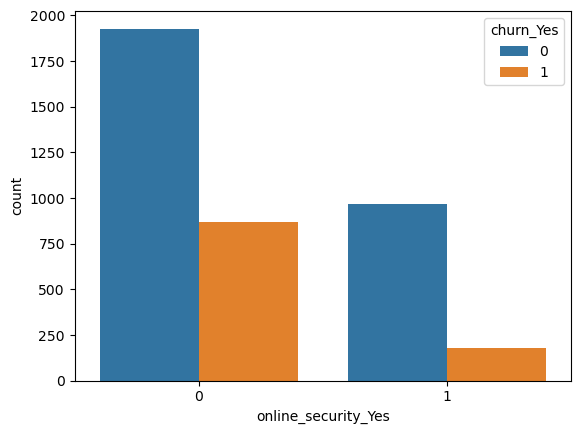

In [80]:
online_security_vs_churn = sns.countplot(train.online_security_Yes, hue = train.churn_Yes)

<AxesSubplot:xlabel='online_security_Yes', ylabel='count'>

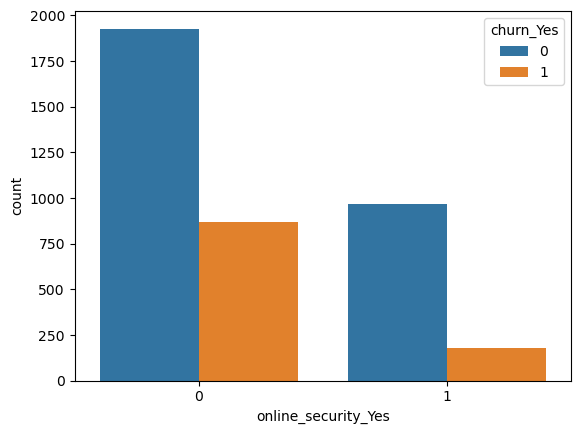

In [81]:
sns.countplot(train['online_security_Yes'], hue = train.churn_Yes)

<AxesSubplot:xlabel='tech_support_Yes', ylabel='count'>

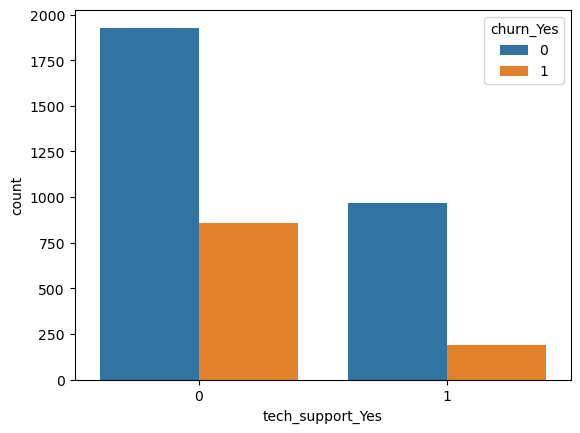

In [102]:
sns.countplot(train.tech_support_Yes, hue = train.churn_Yes)

## Questions I want to explore:

copied from above

1) Are customers with higher tenure less likely to churn?  
2) Are individual customers more likely to churn than those with a partner or dependents?
3) So higher monthly charges contribute to higher churn?
4) Do certain contract types have higher churn?
5) Does fiber optic service type  have lower churn?

In [110]:
# tenure vs churn
tenure_churn_barplot
#why is it not showing the graph?

<AxesSubplot:xlabel='churn_Yes', ylabel='tenure'>

In [ ]:
#individual customer more likely to churn than those with dependents or partners


In [ ]:
#higher monthly charges higher churn

In [ ]:
#certain contract types have higher churn

In [ ]:
#fiber optic has lower churn